# Proyek Analisis Data : Bike


*   Nama : Karren Gabriella Khoirunnisa
*   Email : m312b4kx2144@bangkit.academy
*   ID Dicoding : karrengabriella



## Pertanyaan Bisnis



*   Pertanyaan 1 : Bagaimana pola penggunaan sepeda berdasarkan musim?
*   Pertanyaan 2 : Bagaimana waktu (jam) memengaruhi jumlah penyewaaan sepeda?



### Import Packages/Library yang digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Insight : pada bagian ini, perlu mengimpor semua library yang akan digunakan untuk analisis.

## Data Wrangling

### Gathering Data

In [3]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/karrengabriella/analisis-data_bike/main/data/hour.csv')
day_df = pd.read_csv('https://raw.githubusercontent.com/karrengabriella/analisis-data_bike/main/data/day.csv')

Insight  :Data diambil dari sumber eksternal (GitHub) menggunakan fungsi pd.read_csv(). Dataset ini berisi data penyewaan sepeda per jam dan harian.

## Assesing Data

In [10]:
print("Data Hour:")
print(hour_df.head())
print("\nData Day:")
print(day_df.head())

print("\nInformasi Data Hour:")
print(hour_df.info())
print("\nInformasi Data Day:")
print(day_df.info())

Data Hour:
   instant      dteday season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01    NaN   0     1   0        0        6           0   
1        2  2011-01-01    NaN   0     1   1        0        6           0   
2        3  2011-01-01    NaN   0     1   2        0        6           0   
3        4  2011-01-01    NaN   0     1   3        0        6           0   
4        5  2011-01-01    NaN   0     1   4        0        6           0   

   weathersit  ...   hum  windspeed  casual  registered  cnt  \
0           1  ...  0.81        0.0       3          13   16   
1           1  ...  0.80        0.0       8          32   40   
2           1  ...  0.80        0.0       5          27   32   
3           1  ...  0.75        0.0       3          10   13   
4           1  ...  0.75        0.0       0           1    1   

             datetime  year month  day  hour  
0 2011-01-01 00:00:00  2011     1    1     0  
1 2011-01-01 01:00:00  2011     1    1     1  


Insight : Kolom penting seperti season, hr, dan cnt dapat digunakan untuk analisis lebih lanjut.

### Cleaning Data

In [4]:
# Function for data cleaning
def clear_data(df):
    # Remove duplicates
    df_cleaned = df.drop_duplicates()
    # Handle missing values (drop rows with missing values)
    df_cleaned = df_cleaned.dropna()
    return df_cleaned

# Membersihkan data menggunakan fungsi clear_data
hour_df_cleaned = clear_data(hour_df)
day_df_cleaned = clear_data(day_df)

Insight : Data cleaning mencakup penghapusan duplikasi dan missing values. Ini memastikan bahwa analisis dilakukan pada data yang bersih dan relevan.

### Exploratory Data Analysis (EDA)

## Explore Data

In [5]:
# Ekstraksi fitur tambahan dari dataset hour_df dan day_df
hour_df['season'] = hour_df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
hour_df['datetime'] = pd.to_datetime(hour_df['dteday']) + pd.to_timedelta(hour_df['hr'], unit='h')

# Melakukan grouping data
season_counts_hour = hour_df_cleaned.groupby('season')['cnt'].sum().reset_index()

In [6]:
# Ekstraksi Fitur Tambahan
hour_df['datetime'] = pd.to_datetime(hour_df['dteday']) + pd.to_timedelta(hour_df['hr'], unit='h')
hour_df['year'] = hour_df['datetime'].dt.year
hour_df['month'] = hour_df['datetime'].dt.month
hour_df['day'] = hour_df['datetime'].dt.day
hour_df['hour'] = hour_df['datetime'].dt.hour
hour_df['season'] = hour_df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

day_df['datetime'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['datetime'].dt.year
day_df['month'] = day_df['datetime'].dt.month
day_df['season'] = day_df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


Insight : melakukan transformasi fitur dengan menambahkan kolom baru seperti season dan datetime. Dilakukan grouping data untuk analisis lebih lanjut. Fitur tambahan seperti season memungkinkan untuk mengamati pola berdasarkan musim.

*   Pertanyaan 1 : Bagaimana pola penggunaan sepeda berdasarkan musim?

In [7]:
# Menghitung rata-rata penyewaan berdasarkan musim
season_avg = hour_df_cleaned.groupby('season')['cnt'].mean().reset_index()

# Menghitung rata-rata penyewaan berdasarkan jam
hour_avg = hour_df_cleaned.groupby('hr')['cnt'].mean().reset_index()

* Insight : EDA Univariate, untuk mengelompokkan data penyewaan sepeda (cnt) berdasarkan musim (season), lalu menghitung rata-rata jumlah penyewaan untuk setiap musim.

*   Pertanyaan 2 : Apakah ada pola penyewaan sepeda berdasarkan jam tertentu dalam sehari?

In [8]:
# Menghitung rata-rata penyewaan berdasarkan jam
hour_avg = hour_df_cleaned.groupby('hr')['cnt'].mean().reset_index()

* Insight : EDA Univariate untuk mengelompokkan data penyewaan sepeda berdasarkan jam (hr), lalu menghitung rata-rata jumlah penyewaan per jam.

### Visualization & Explanatory Analysis

Pertanyaan 1 : Bagaimana pola penggunaan sepeda berdasarkan musim?

<ipython-input-67-6ec55e51433e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_avg, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

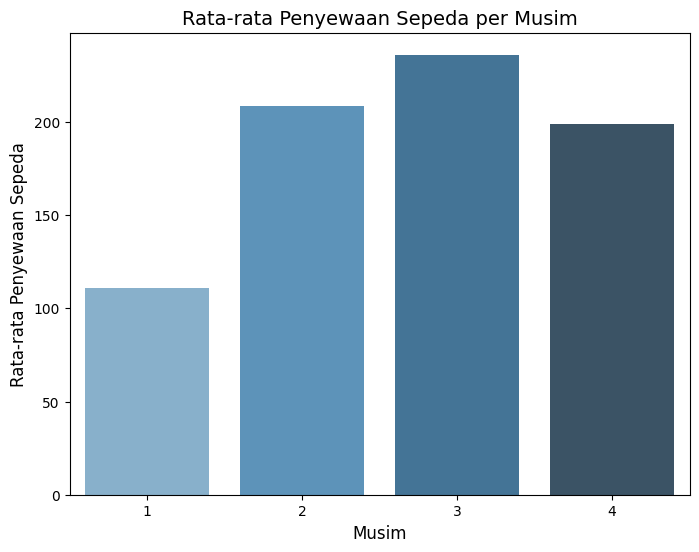

In [67]:
# Visualisasi dengan bar chart (Musim)
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=season_avg, palette='Blues_d')
plt.title('Rata-rata Penyewaan Sepeda per Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.show()

* Insight : Visualisasi barplot memperjelas perbedaan jumlah penyewaan di setiap musim, dengan penekanan khusus pada Summer dan Fall yang memiliki warna lebih terang untuk menyoroti tingginya jumlah penyewaan.

Pertanyaan 2 : Bagaimana pola penyewaan sepeda berdasarkan jam?

<ipython-input-68-13c66d433430>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hour_avg, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

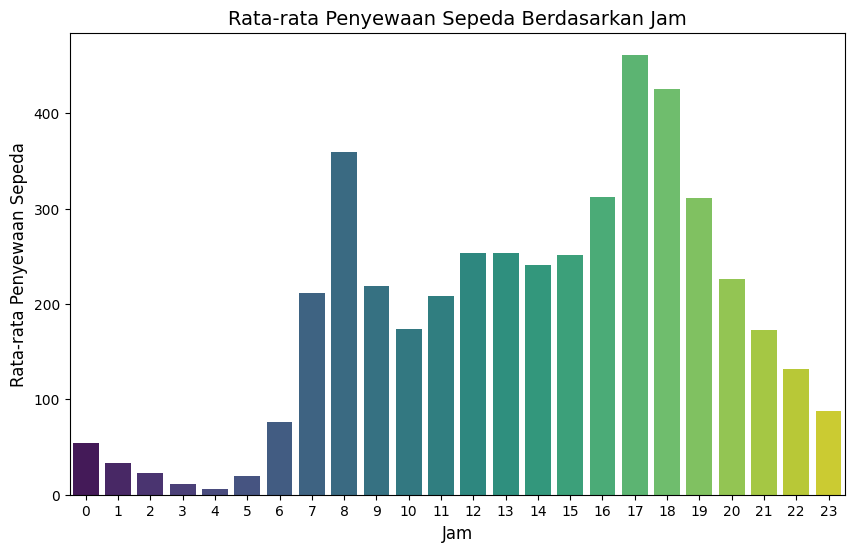

In [68]:
# Visualisasi rata-rata penyewaan sepeda berdasarkan jam dengan barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=hour_avg, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(range(0, 24))
plt.show()

* Insight :  Dari visualisasi barplot, terlihat bahwa puncak penyewaan sepeda terjadi pada jam-jam sibuk, yaitu di pagi hari sekitar pukul 8-9 dan di sore hari sekitar pukul 17-18. Ini menunjukkan bahwa penggunaan sepeda cenderung meningkat pada jam pergi dan pulang kerja, menandakan tingginya penggunaan sepeda sebagai moda transportasi.


## Analisis Data klastering

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


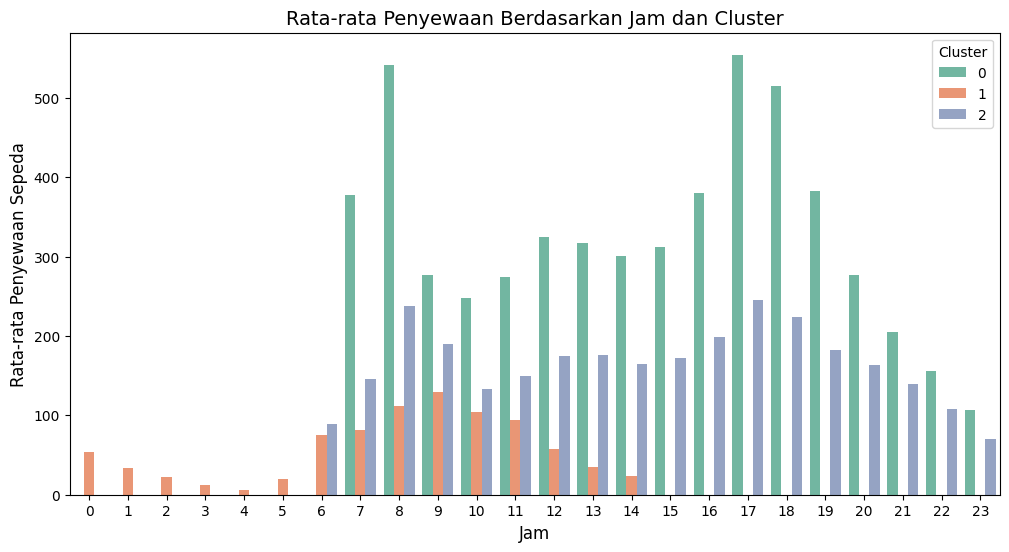

In [70]:
# Mengambil data musim, jam, dan penyewaan
X = hour_df_cleaned[['season', 'hr', 'cnt']]

# Melakukan scaling pada data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menjalankan KMeans clustering dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
hour_df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering (Cluster vs Jam) dengan barplot
cluster_avg = hour_df_cleaned.groupby(['hr', 'cluster'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', hue='cluster', data=cluster_avg, palette='Set2')

# Menambahkan judul dan label
plt.title('Rata-rata Penyewaan Berdasarkan Jam dan Cluster', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Cluster')
plt.show()

* Insight : Clustering berdasarkan musim dan jam, Menggunakan KMeans untuk mengelompokkan data penyewaan sepeda berdasarkan musim dan jam untuk membantu mengidentifikasi pola dalam penggunaan sepeda di waktu yang berbeda dan musim yang berbeda. Setelah melakukan klastering, tiga pola klaster berbeda ditemukan. Cluster 0 mengindikasikan penyewaan rendah, terjadi di luar jam sibuk. Cluster 1 menunjukkan penyewaan moderat sepanjang hari, sedangkan Cluster 2 menggambarkan puncak penyewaan pada jam sibuk, terutama di musim yang lebih hangat (Summer dan Fall).

In [69]:
#statistik Deskriptif

print("\nStatistik Deskriptif Data Hour:")
print(hour_df.describe())

print("\nStatistik Deskriptif Data Day:")
print(day_df.describe())


Statistik Deskriptif Data Hour:
          instant            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
min        0.000000      0.000000   

* Insight : Distribusi penyewaan sepeda memiliki variabilitas tinggi dengan adanya jam-jam puncak dan musim tertentu yang meningkatkan penggunaan.

### Conclusion(Kesimpulan) :

conclusion pertanyaan 1:

Musim mempengaruhi pola penggunaan sepeda, Berdasarkan analisis rata-rata penyewaan sepeda per musim, terlihat bahwa musim Summer dan Fall memiliki tingkat penyewaan sepeda yang paling tinggi dibandingkan musim lainnya. Ini kemungkinan besar karena cuaca yang lebih hangat dan nyaman untuk aktivitas luar ruangan. Sebaliknya, penyewaan sepeda berkurang secara signifikan di musim Winter, saat kondisi cuaca kurang mendukung. Oleh karena itu, penyesuaian jumlah sepeda dan promosi musiman dapat difokuskan pada musim panas dan gugur untuk memaksimalkan pendapatan.

Conclusion pertanyaan 2:

Pola penggunaan sepeda sangat dipengaruhi oleh aktivitas harian, terutama pada jam sibuk ketika orang-orang berangkat dan pulang kerja. Strategi peningkatan ketersediaan sepeda pada jam-jam ini bisa membantu memenuhi permintaan yang lebih tinggi.

# Conclusion Klastering:

Penyewaan sepeda perlu diperbanyak di musim Summer dan Fall pada jam-jam sibuk, sementara di musim Winter, ketersediaan bisa disesuaikan untuk cluster dengan aktivitas rendah.